## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [99]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

In [100]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [101]:
uber_data.head()
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_uid           678 non-null    object 
 1   trip_time          678 non-null    object 
 2   total_time         678 non-null    object 
 3   wait_time          678 non-null    object 
 4   price_rub          678 non-null    object 
 5   price_usd          678 non-null    float64
 6   distance_kms       678 non-null    float64
 7   temperature_value  678 non-null    int64  
 8   feels_like         678 non-null    int64  
 9   humidity           678 non-null    float64
 10  wind_speed         678 non-null    float64
 11  cloudness          678 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 47.7+ KB


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [102]:
# answer goes here

def get_min(time_str): 
    """Get Seconds from time.""" 
    h, m, s = time_str.split(':') 
    return int(h)*60 + int(m) + round((int(s) / 60),2)

uber_data['trip_time'] = uber_data['trip_time'].apply(get_min)
uber_data['total_time'] = uber_data['total_time'].apply(get_min)
uber_data['wait_time'] = uber_data['wait_time'].apply(get_min)



In [103]:
uber_data

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.55,29.0,7.45,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.45,26.0,6.55,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.88,83.0,16.12,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.62,20.0,6.38,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.90,49.0,10.10,665,13.43,21.92,3,1,0.90,1.61,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
673,ce5bdea8e9c366b2f9f9cdf1bb879965,10.62,12.0,1.38,161,2.60,5.79,6,4,0.39,2.57,0.18
674,3a1df88ce67d8f749ac5f09da8b4dadf,23.68,37.0,13.32,241,3.92,11.46,7,3,0.62,5.37,0.48
675,1879ce44367d4cc555479253323ec36d,16.33,35.0,18.67,174,2.78,6.68,8,6,0.76,4.02,0.9
676,7a237cb245b6ca854498ecb7c842beb3,19.32,23.0,3.68,209,3.33,7.48,9,7,0.68,4.28,0.79


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

In [105]:
uber_data['cloudness'] = uber_data['cloudness'].apply(str.strip).replace('Node Not Available', np.nan)
uber_data['cloudness'] = pd.to_numeric(uber_data['cloudness'], downcast='float')

In [104]:
uber_data['price_rub'] = uber_data['price_rub'].str.replace(',','')
uber_data['price_rub'] = pd.to_numeric(uber_data['price_rub'], downcast='float')

trip_uid


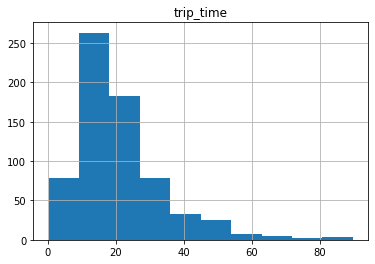

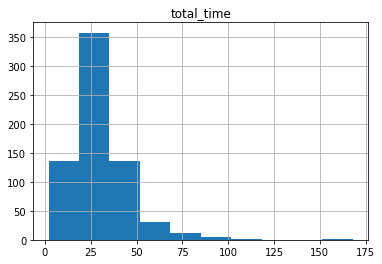

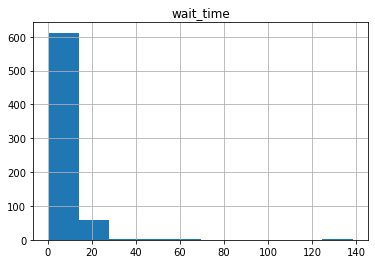

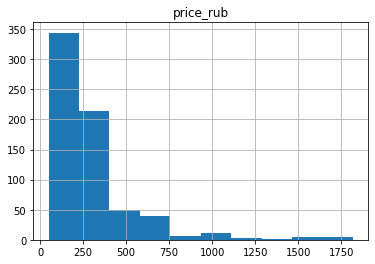

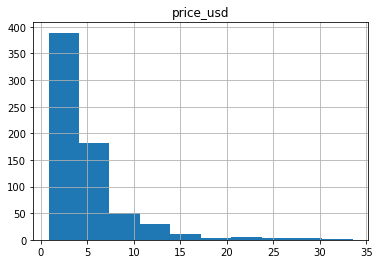

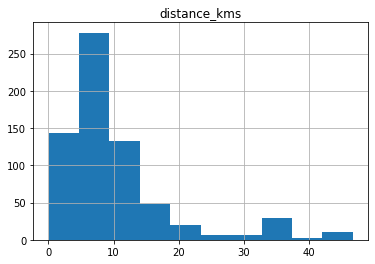

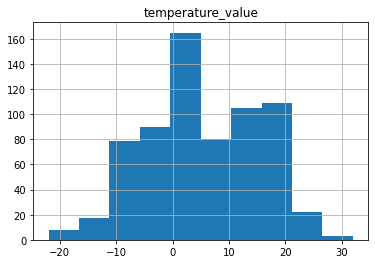

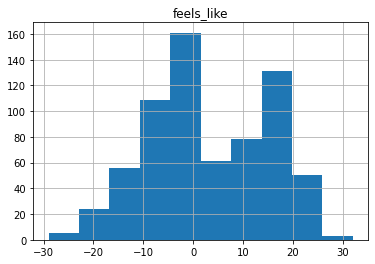

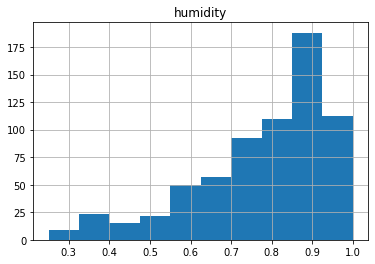

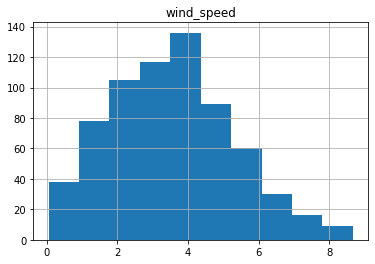

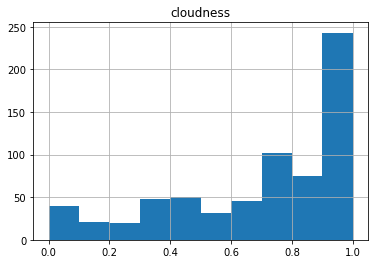

In [106]:
# answer goes here

for i in uber_data: 
    try: 
        uber_data.hist(i) 
        plt.show() 
    except: 
        print(i)



Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)


trip_time -- HAS OUTLIERS -- Outliers could potentially be individuals stuck in rush hour traffic. Correct unusually large values.

total_time -- HAS OUTLIERS -- Outliers could potentially be individuals stuck in rush hour traffic. Correct unusually large values.

wait_time -- HAS OUTLIERS -- Outliers could be individuals waiting during rush hour traffic. Or waiting for a ride after a busy event. Correct unusually large values.

price_rub -- HAS OUTLIERS -- I have no idea what this column means. Correct unusually large values.

price_usd -- HAS OUTLIERS -- Outliers could be rides taken during surge pricing. Correct unusually large values.

distance_kms -- HAS OUTLIERS -- Outliers could be individuals being picked up from the airport and headed on long journeys back home. Correct unusually large values.

temperature_value -- NO OUTLIERS -- Extremely hot or cold days.

feels_like -- NO OUTLIERS -- Extremely hot or cold days.	

humidity -- NO OUTLIERS -- Very moist or dry days.	

wind_speed --NO OUTLIERS --  Picked up during a hurricane or tornado	

cloudness -- NO OUTLIERS -- Heavy rain approaching

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [ ]:
# answer goes here

threshold = 1.5
q75, q25 = np.percentile(uber_data['trip_time'], [10,90])
iqr = q75 - q25
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)

plt.subplot(121)
uber_data[['trip_time']].boxplot(whis=1.5)
plt.title('All Data')

plt.subplot(122)
uber_data.loc[(uber_data['trip_time'] < max_val) &
              (uber_data['trip_time'] > min_val),
              ['trip_time']].boxplot(whis=1.5)
plt.title('Outliers Removed')
plt.show()



In [61]:
# Trips that were trip_time outliers. 

out = (uber_data.loc[(uber_data['trip_time'] > max_val) | (uber_data['trip_time'] < min_val)])

out

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,minutes
2,6e460cc8a12c3c6568d0d4a67ac58393,66.88,83.0,16.12,644.000000,13.01,18.01,14,14,0.61,5.25,0.86,66.88
13,36695e9088a840d3f7476e86294aa846,50.22,64.0,13.78,228.000000,4.20,9.41,29,31,0.63,5.11,0.75,50.22
29,72801dd197d168a38ebaa88875492d60,68.07,88.0,19.93,1500.000000,27.29,21.22,16,16,0.66,5.75,0.62,68.07
45,f981dcaa5c7120490cdd38357b78c79c,48.22,57.0,8.78,1800.000000,33.55,19.14,15,15,0.41,5.95,0.46,48.22
47,e4004a6b46e6e1556f76f63f295a3f37,62.02,77.0,14.98,593.000000,10.46,15.63,14,14,0.91,4.70,0.79,62.02
79,51785bfdf539132f5304a7ae1e1a6d9e,53.22,60.0,6.78,518.000000,7.84,13.78,16,16,0.67,4.67,0.75,53.22
106,176e430aa7aafb4472cb09677d05fc2b,51.05,57.0,5.95,1000.000000,15.43,36.50,9,6,0.65,4.82,0.31,51.05
108,22f1e9c384f584cf65c51555e5428703,85.32,103.0,17.68,1000.000000,16.00,46.04,-3,-3,0.97,0.95,0.18,85.32
117,ab98f8918dff094689ae1657dadb6bbd,71.20,81.0,9.80,669.000000,10.17,17.32,-2,-7,0.75,4.86,0.84,71.20
201,5383e6be5bc4f5edc74d2a22a422e30f,47.97,57.0,9.03,349.000000,5.28,9.54,21,21,0.82,2.64,0.80,47.97


There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

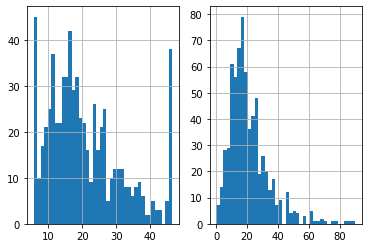

In [98]:
# answer goes here

win = pd.Series(winsorize(uber_data['trip_time'], .05))

plt.subplot(121)
win.hist(bins=40)

plt.subplot(122)
uber_data['trip_time'].hist(bins=40)
plt.show()





Any value outside of the stated IQR is added to whatever the low and high range for the IQR is. All low values are added to the low IQR and all high values are added to the high IQR